## Online news popularity analysis

### Abstract:
The dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The analysis is done on them to find out which feature/attribute contribute maximum in the popularity and predict the popularity of future news articles in advance before they are published online.

The dataset is obtained from : _[Online news Popularity Data set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity)_

### Goal:
Predict the popularity of an online article i.e the maximum no of shares

### Data set Information:
- Characteristics: Multi-variate
- No. of instances: 39797
- Attribute Characteristics: Integer, Real
- No. of attributes: 61
- Machine learning models: Prediction models

### Attribute information:
- 58 predictive attributes
- 2 non-predictive attributes (URL , timedelta)
- 1 goal field

In [8]:
#import libraries
import numpy as np
import pandas as pd
import csv
import datetime as dt
import pandas_profiling
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('annsara95','AuWDdjJlktWvd5CChUlA')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__ )

2.5.1


In [3]:
#read csv
df = pd.read_csv("OnlineNewsPopularity.csv",delimiter=',',skipinitialspace=True)

In [3]:
df

url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   
5       http://mashable.com/2013/01/07/beewi-smart-toys/      731.0   
6      http://mashable.com/2013/01/07/bodymedia-armba...      731.0   
7       http://mashable.com/2013/01/07/canon-poweshot-n/      731.0   
8      http://mashable.com/2013/01/07/car-of-the-futu...      731.0   
9      http://mashable.com/2013/01/07/chuck-hagel-web...      731.0   
10     http://mashable.com/2013/01/07/cosmic-events-d...      731.0   
11      http://mashable.com/2013/01/07/crayon-creatures/      731.0   
12         http://mashable.com/2013/01/07/creature-cups/      731.0   
13             http://mashable.com/2013/01/07/dad-jokes/      731.0   
14     http://mashable.com/2013/01/07/downton-abbey-t...      731.0   
15     http://mashable.com/2013/01/07/earth-size-plan...      731.0   
16             http://mashable.com/2013/01/07/echo-game/      731.0   
17     http://mashable.com/2013/01/07/entrepreneur-tr...      731.0   
18     http://mashable.com/2013/01/07/facebook-sick-app/      731.0   
19     http://mashable.com/2013/01/07/felt-audio-puls...      731.0   
20          http://mashable.com/2013/01/07/ford-glympse/      731.0   
21      http://mashable.com/2013/01/07/ftc-google-leaks/      731.0   
22     http://mashable.com/2013/01/07/fujifilm-50x-su...      731.0   
23     http://mashable.com/2013/01/07/hillary-clinton...      731.0   
24                http://mashable.com/2013/01/07/htc-q1/      731.0   
25     http://mashable.com/2013/01/07/huawei-ascend-m...      731.0   
26     http://mashable.com/2013/01/07/iheartradio-app...      731.0   
27     http://mashable.com/2013/01/07/intel-awesome-l...      731.0   
28     http://mashable.com/2013/01/07/isp02-iphone-ta...      731.0   
29        http://mashable.com/2013/01/07/jobs-contently/      731.0   
...                                                  ...        ...   
39614  http://mashable.com/2014/12/26/the-interview-i...        9.0   
39615  http://mashable.com/2014/12/26/toothpaste-fluo...        9.0   
39616  http://mashable.com/2014/12/26/top-photography...        9.0   
39617  http://mashable.com/2014/12/26/tor-attacked-li...        9.0   
39618  http://mashable.com/2014/12/26/tsa-gift-wrap-r...        9.0   
39619  http://mashable.com/2014/12/26/tsunami-10-year...        9.0   
39620  http://mashable.com/2014/12/26/turkey-teen-ins...        9.0   
39621  http://mashable.com/2014/12/26/ukraine-prisone...        9.0   
39622  http://mashable.com/2014/12/26/wacky-kickstart...        9.0   
39623        http://mashable.com/2014/12/26/what-is-tor/        9.0   
39624  http://mashable.com/2014/12/27/air-asia-flight...        9.0   
39625  http://mashable.com/2014/12/27/als-ice-bucket-...        9.0   
39626  http://mashable.com/2014/12/27/christmas-tree-...        9.0   
39627  http://mashable.com/2014/12/27/extremist-leade...        9.0   
39628  http://mashable.com/2014/12/27/facebook-year-i...        9.0   
39629  http://mashable.com/2014/12/27/frozen-doll-prank/        9.0   
39630  http://mashable.com/2014/12/27/high-school-i-c...        9.0   
39631  http://mashable.com/2014/12/27/japan-elderly-d...        9.0   
39632  http://mashable.com/2014/12/27/las-vegas-new-y...        9.0   
39633  http://mashable.com/2014/12/27/lbj-adviser-sla...        9.0   
39634  http://mashable.com/2014/12/27/music-grid-outf...        9.0   
39635   http://mashable.com/2014/12/27/nike-marc-newson/        9.0   
39636  http://mashable.com/2014/12/27/north-korea-int...        8.0   
39637  http://mashable.com/2014/12/27/nypd-rafael-ram...        8.0   
39638  http://mashable.com/2014/12/27/protests-contin...        8.0   
39639 

In [4]:
df.shape

(39644, 61)

In [5]:
pandas_profiling.ProfileReport(df)

### News maximum shared:
If a news is maximum shared, it shows that it is reached out to many people and it the popularity of news increases. Hence, higher no of shares is directly proportional to popularity of news. Hence, we need to find put how the other attributes perform w.r.t shares.

In [6]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

### Which channel articles are mostly published??
To find out which channel articles is maximum popular, we need to find out which channel is mostly published.

In [4]:
channel_list = df.columns[13:19]

In [5]:
init_notebook_mode(connected=True)
channel_list = [ 'Lifestyle', 'Entertainment', 'Business', 'Social Media', 'Techology', 'World']
channel_dic = {}
col_channel =  list(df.columns[13:19])
for channel,c in zip(channel_list,col_channel):
    channel_dic[channel] = df[c].value_counts()[1]
print(channel_dic)

{'Lifestyle': 2099, 'Entertainment': 7057, 'Business': 6258, 'Social Media': 2323, 'Techology': 7346, 'World': 8427}


In [9]:
data = [go.Bar(x= list(channel_dic.keys()),y= list(channel_dic.values()))]
layout = dict(title = 'Distribution of Channel', xaxis = dict(title = 'Channel'),yaxis = dict(title = 'Frequency'))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename= 'channel-distribution')
py.image.save_as(fig, filename='channel-distribution.png')

###  Result:
The above graph shows that world related articles are mostly published i.e 8427 followed by technology(7346). Least published is lifestyle(2099). This shows that most popular articles are related to world news.

### Which day of the week has highest news articles being published?

In [10]:
df.columns[31:38]

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'],
      dtype='object')

In [11]:
init_notebook_mode(connected=True)
weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_dic = {}
col_days=list(df.columns[31:38])
for weekday,w in zip(weekday_list,col_days):
    weekday_dic[weekday] = df[w].value_counts()[1]
print(weekday_dic)

{'Monday': 6661, 'Tuesday': 7390, 'Wednesday': 7435, 'Thursday': 7267, 'Friday': 5701, 'Saturday': 2453, 'Sunday': 2737}


In [12]:
data = [go.Bar(x= list(weekday_dic.keys()),y= list(weekday_dic.values()))]
layout = dict(title = 'Distribution of Weekdays',xaxis = dict(title = 'Weekdays'),yaxis = dict(title = 'Frequency'))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename= 'weekday-distribution')
py.image.save_as(fig, filename='weekday-distribution.png')

### Result:
The above graph shows that Wednesday(7435) has the highest articles published i.e 7435, followed by Tuesday(7390) and least is on Saturday(2453). The weekdays have higher number of articles published than that of weekends.

### Distribution of global subjectivity w.r.t shares:

In [13]:
init_notebook_mode(connected=True)
data = [go.Scatter(x= df['global_subjectivity'],y=df['shares'],mode = 'markers')]
layout = dict(title = 'Distribution of global_subjectivity',xaxis = dict(title = 'global_subjectivity'),
              yaxis = dict(title = 'Shares'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)
py.image.save_as(fig, filename='global_subjectivity-distribution.png')

### Result:
Maximum of global_subjectivity lies between 0.2 to 0.8.A significant outlier lies at global_subjectivity of 0.503 with share of 957.Hence, we conclude that most of the articles with medium global_subjectivity are maximum shares.

### Title sentiment polarity w.r.t shares:
How does the title of an article affect its shares?

In [14]:
data = [go.Scatter(x= df['title_sentiment_polarity'],y=df['shares'],mode = 'markers')]
layout = dict(title = 'Distribution of title_sentiment_polarity',
              xaxis = dict(title = 'title_sentiment_polarity'),
              yaxis = dict(title = 'Shares'),)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
py.image.save_as(fig, filename='title-sentiment-polarity.png')

### Result:
Mostly the articles have titles which are not too positive or negative. It lies with in the range of -0.5 to 0.5. However hgihest concentration can be seen in the 0 axis i.e. high no. of articles are neutral in nature.

### The prediction column - Shares:


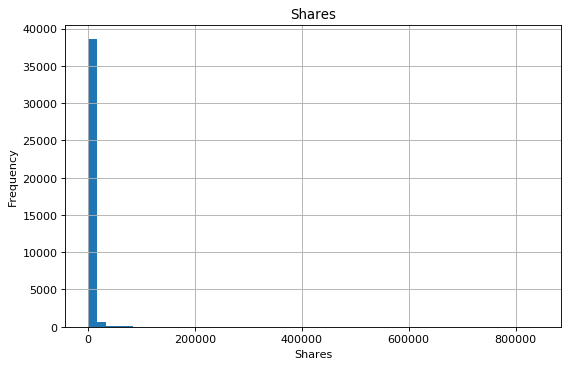

In [18]:
import matplotlib;
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
df['shares'].hist(bins=50)
plt.xlabel("Shares")
plt.title("Shares")
plt.ylabel("Frequency")
plt.show()
fig.savefig("Shares.png")

### Conclusions from EDA:
- Few features like kw_max_min, n_unique_tokens,self_reference_min_shares, shares are highly scewed. Hence, we need to normalized these in order to get good prediction
- Almost all features have high percentage of zero values in them
- Mostly news is related to world, technology and business
- News is published more in weekdays than weekends
- Popularity is directly proportional to the number of shares